# CHAPTER 1: Central Bank Communication and the Yield Curve: A Topic Modelling Approach

## by Ancil Crayton

The purpose of this notebook is to guide readers through the process of preprocessing the Federal Open Market Committee statements, estimating topic models (i.e. extracting topics), tools for model selection, and calculating measures of negativity and uncertainty within the statements. This notebook outputs the topic weights/probabilities and proportions of negativite and uncertain language within the statements into a csv file. Those weights and proportions are then used in a regression analysis in Matlab to look at their influence on the yield curve.

Recent statements can be found at this [link](https://www.federalreserve.gov/monetarypolicy/fomccalendars.htm) on the Federal Reserve Board of Governors's website.

## Part 1: Text Preprocessing

In [1]:
# Standard libraries for data frames, arrays, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# Import Scikit Learn for preprocessing tools and algorithms
import sklearn

# Import library for setting dates
import datetime as dt

# Import library for reading pdf files
import PyPDF2

# Import wordclouds for visualizing topics
import wordcloud

# Import gensim library for calculating coherence measures
import gensim

# Import natural language package to remove stopwords and lemmatize terms
import nltk

In [2]:
# Import in unprocessed statements scraped from Scrapy into a csv file
data = pd.read_csv('Statements2.csv', skipinitialspace=True)
data

,Date,Statement
0,10/05/1999,\r\r\r\r\r\r\r\rThe Federal Open Market Commit...
1,18/05/1999,\r\r\r\r\r\r\r\r\r\r\t\tWhile the FOMC did not...
2,30/06/1999,\r\r\r\r\r\r\r\r\tLabor markets have continued...
3,24/08/1999,\r\r\r\r\r\r\r\r\t With financial markets fun...
4,16/11/1999,\r\r\r\r\r\r\r\r\tThe Federal Open Market Comm...
5,21/12/1999,\r\r\r\r\r\r\r\rThe Federal Open Market Commit...
6,02/02/2000,\r\r\r\r\r\r\r\rThe Federal Open Market Commit...
7,10/03/2000,\r\r\r\r\r\r\r\r\r\rThe Federal Open Market Co...
8,21/03/2000,\r\r\r\r\r\r\r\rThe Federal Open Market Commit...
9,16/05/2000,\r\r\r\r\r\r\r\rThe Federal Open Market Commit...


In [3]:
statements = data['Statement']
statements

0      \r\r\r\r\r\r\r\rThe Federal Open Market Commit...
1      \r\r\r\r\r\r\r\r\r\r\t\tWhile the FOMC did not...
2      \r\r\r\r\r\r\r\r\tLabor markets have continued...
3      \r\r\r\r\r\r\r\r\t  With financial markets fun...
4      \r\r\r\r\r\r\r\r\tThe Federal Open Market Comm...
5      \r\r\r\r\r\r\r\rThe Federal Open Market Commit...
6      \r\r\r\r\r\r\r\rThe Federal Open Market Commit...
7      \r\r\r\r\r\r\r\r\r\rThe Federal Open Market Co...
8      \r\r\r\r\r\r\r\rThe Federal Open Market Commit...
9      \r\r\r\r\r\r\r\rThe Federal Open Market Commit...
10     \r\r\r\r\r\r\r\rThe Federal Open Market Commit...
11     \r\r\r\r\r\r\r\r\tThe Federal Open Market Comm...
12     \r\r\r\r\r\r\r\rThe Federal Open Market Commit...
13     \r\r\r\r\r\r\r\rThe Federal Open Market Commit...
14     \r\r\r\r\r\r\r\rThe Federal Open Market Commit...
15     \r\r\r\r\r\rThe Federal Open Market Committee ...
16     \r\r\r\r\r\r\r\r\tThe Federal Open Market Comm...
17     \r\r\r\r\r\r\r\rThe Fede

In [4]:
# Import in unprocessed minutes scraped from Scrapy into a csv file
data2 = pd.read_csv('FOMC Minutes.csv', skipinitialspace=True)
data2

,Release Date,Minutes
0,"July 1, 1999","By unanimous vote, the minutes of the meeting ..."
1,"August 26, 1999","By unanimous vote, the minutes of the meeting ..."
2,"October 7, 1999","By unanimous vote, the minutes of the meeting ..."
3,"November 18, 1999","By unanimous vote, the minutes of the meeting ..."
4,"December 23, 1999","By unanimous vote, the minutes of the meeting ..."
5,"February 3, 2000","By unanimous vote, the minutes of the meeting ..."
6,"March 23, 2000","By unanimous vote, the Program for Security of..."
7,"March 23, 2000","By unanimous vote, the minutes of the meeting ..."
8,"June 29, 2000","By unanimous vote, the minutes of the meeting ..."
9,"August 24, 2000","By unanimous vote, the minutes of the meeting ..."


In [5]:
minutes = data2["Minutes"]

In [6]:
# Import tools to tokenize, remove stopwords, and lemmatize (or stem) words
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Import digits module to filter out numbers
#import re
import string
from string import digits

In [7]:
# Lowercase, remove digits, and lemmatize statements
n=len(statements)
#porter_stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
for i in range(n):
    strip = CountVectorizer().build_tokenizer()(statements[i].lower())
    strip2 = [w for w in strip if not w.isdigit()]
    filtered = [w for w in strip2 if not w in stopwords.words('english')]
    lemma = [lemmatizer.lemmatize(w) for w in filtered]
    statements[i] = ' '.join(lemma)

In [8]:
# Example of processed statement
statements[0]

'federal open market committee decided today leave target federal fund rate unchanged strengthening productivity growth fostering favorable trend unit cost price much recent information suggests trend sustained nonetheless growth demand continued outpace supply evidenced decreasing pool available worker willing take job circumstance federal open market committee need especially alert month ahead potential cost increase significantly excess productivity manner could contribute inflation pressure undermine impressive performance economy background committee adopted directive biased toward possible firming policy going forward committee member emphasized directive signify commitment near term action committee need evaluate additional information balance aggregate supply demand condition financial market'

In [9]:
# Lowercase, remove digits, and lemmatize minutes
n2=len(minutes)
for i in range(n2):
    strip = CountVectorizer().build_tokenizer()(minutes[i].lower())
    strip2 = [w for w in strip if not w.isdigit()]
    filtered = [w for w in strip2 if not w in stopwords.words('english')]
    lemma = [lemmatizer.lemmatize(w) for w in filtered]
    minutes[i] = ' '.join(lemma)

In [10]:
# Example of processed minute
minutes[0]

'unanimous vote minute meeting federal open market committee held march approved manager system open market account reported recent development foreign exchange market open market operation foreign currency system account period since previous meeting thus vote required committee manager also reported development domestic financial market system open market transaction government security federal agency obligation period march may unanimous vote committee ratified transaction committee voted unanimously extend one year beginning mid december reciprocal currency swap arrangement bank canada bank mexico arrangement bank canada amount billion equivalent bank mexico amount billion equivalent arrangement associated federal reserve participation north american framework agreement established vote renew taken meeting rather later year give committee member timely opportunity discus whether wanted extend maturity agreement term agreement require decision renew communicated swap line partner le

## Part 2: Feature Extraction

Next, we must extract features from the normalized text using the Sci-kit Learn package. We will extract them by transforming the pure text into a document-term matrix of the term frequency-inverse document frequency format (tf-idf). We create unigram and bigram representations. This allows us to look at the frequency of single words and contiguous pairs of words (unigram and bigram, respectively).

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
# Create unigram TF-IDF weighted matrix
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,1), min_df=0.05, max_df=0.95)
X_tfidf = tfidf_vectorizer.fit_transform(statements).toarray()
X_tfidf.shape

(159, 552)

In [13]:
# Create bigram TF-IDF weighted matrix
bigram_tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=0.05, max_df=0.95)
X1_tfidf = bigram_tfidf_vectorizer.fit_transform(statements).toarray()
X1_tfidf.shape

(159, 1486)

## Part 3: Topic Modeling with Non-negative Matrix Factorization

In [14]:
# Import NMF from Scikit Learn and 
from sklearn.decomposition import NMF

In [15]:
# Create a function that prints the top words of a topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [16]:
# Create a function that prints the topics as a list
def print_topics(model, feature_names, n_top_words, n_components):
    topics=list(range(n_components))
    for topic_idx, topic in enumerate(model.components_):
        topics[topic_idx]=[str(feature_names[i]) for i in topic.argsort()[:-n_top_words - 1:-1]]
    return topics

In [17]:
# Get the terms from the TF-IDF matrix
tfidf_feature_names_n1 = tfidf_vectorizer.get_feature_names()
tfidf_feature_names_n2 = bigram_tfidf_vectorizer.get_feature_names()

In [18]:
# Estimate preliminary unigram NMF model with three topics
nmf = NMF(n_components=3, random_state=1).fit(X_tfidf) # minimizes using the Frobenius norm for unigrams
print_top_words(nmf, tfidf_feature_names_n1, 15)

Topic #0: inflation labor longer range security employment percent term condition agency maximum objective measure run expected
Topic #1: board approved basis action point growth discount reserve inflation bank price sustainable percent belief request
Topic #2: security purchase inflation level recovery consistent mandate continue financial agency mortgage backed low credit billion



In [19]:
# Estimate preliminary bigram NMF model with three topics
nmf2 = NMF(n_components=3, random_state=1).fit(X1_tfidf) # minimizes using the Frobenius norm for bigrams
print_top_words(nmf2, tfidf_feature_names_n2, 15)

Topic #0: inflation labor labor market longer security range employment term agency percent condition longer run maximum employment maximum objective
Topic #1: board basis point approved basis action point growth action board discount rate discount reserve federal reserve inflation bank reserve bank
Topic #2: security inflation level purchase recovery economic recovery consistent mandate continue financial credit agency low likely price



Below we naively estimate the NMF model with three components with the objective fuction minimizing the kullback-leibler distance. We see that the components are quite similar between the two different objective functions in our application.

In [20]:
# Estimate preliminary unigram NMF model with three topics
nmf3 = NMF(n_components=3, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=10000).fit(X_tfidf) # minimizes using kullback-leibler with unigrams
print_top_words(nmf3, tfidf_feature_names_n1, 15)

Topic #0: inflation longer labor term condition policy price security fund run employment pace percent range agency
Topic #1: board growth approved action basis point discount reserve sustainable productivity belief risk demand price available
Topic #2: security credit financial reserve recovery level exceptionally purchase continue promote subdued facility billion condition housing



In [21]:
# Estimate preliminary bigram NMF model with three topics
nmf4 = NMF(n_components=3, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=10000).fit(X1_tfidf) # minimizes using kullback-leibler with bigrams
print_top_words(nmf4, tfidf_feature_names_n2, 15)

Topic #0: inflation longer labor term labor market condition policy run security employment range pace fund fund rate federal fund
Topic #1: board growth basis point action approved basis point discount action board discount rate target federal risk reserve price federal reserve
Topic #2: security financial credit level financial market reserve recovery federal reserve promote economic recovery continue purchase condition subdued exceptionally low



## Part 4: Parameter Selection for Non-negative Matrix Factorization

One of the main issues in topic modelling is deciding on the k parameter. This parameter is the number of topics to estimate in the model. Naturally, when we develop a topic model in the social sciences, we would like our topics to be defined and interpretable. Therefore, to automatically select the k parameter, we use measures of topic coherence. In general, topic coherence measures the semantic similarity between the top terms used to represent a topic (Greene and Cross, 2017). There exists numerous measures of coherency with the most common measures being the C_umass, C_uci, and C_v.

There exists a distinction between extrinsic and intrinsic topic coherency measures. Extrinsic measures use external datasets to assess coherency or what we refer to as "background corpora." The argument behind these measures is that using the same dataset to assess coherency would reinforce noise or unusual word statistics. Standard measures for this is the C_uci and the C_v. Intrinsic measures simply use the main corpus and use empirical estimates of probabilities to define its measure. A standard intrinsic coherence measure is the C_umass. All of these measures are openly available in the gensim package.

In a study by Roeder et al. (2015), it is found that the C_v measure is the best measure of coherency to use for topic modelling applications in niche fields. Since this is an extrinsic measure, we require a background corpus. We use the minutes of the FOMC meetings.

In [22]:
# Retrieve modules to set corpous and get coherence. Show logging details to see progress.
from gensim import corpora, models
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [23]:
# Tokenize each statement, add terms to dictionary, and build main corpus
for i in range(n):
    statements[i] = CountVectorizer().build_tokenizer()(statements[i])
dictionary=corpora.Dictionary(statements)
corpus=[dictionary.doc2bow(doc) for doc in statements]

2018-02-21 19:39:18,056 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-02-21 19:39:18,105 : INFO : built Dictionary(1457 unique tokens: ['federal', 'open', 'market', 'committee', 'decided']...) from 159 documents (total 33967 corpus positions)


In [24]:
# Construct the background corpus using the minutes from the FOMC meetings
for i in range(n2):
    minutes[i] = CountVectorizer().build_tokenizer()(minutes[i])
dictionary2=corpora.Dictionary(minutes)
corpus2=[dictionary.doc2bow(doc) for doc in minutes]

2018-02-21 19:39:18,466 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-02-21 19:39:18,823 : INFO : built Dictionary(5973 unique tokens: ['unanimous', 'vote', 'minute', 'meeting', 'federal']...) from 147 documents (total 472623 corpus positions)


In [25]:
# Add the terms contained in minutes to the overall dictionary
dictionary.add_documents(minutes)

2018-02-21 19:39:19,103 : INFO : adding document #0 to Dictionary(1457 unique tokens: ['federal', 'open', 'market', 'committee', 'decided']...)
2018-02-21 19:39:19,460 : INFO : built Dictionary(6021 unique tokens: ['federal', 'open', 'market', 'committee', 'decided']...) from 306 documents (total 506590 corpus positions)


In [26]:
# Parameter selection using intrinsic coherence measure, u_mass. This measure uses the main corpus, which has its issues according to XXX paper
end_k=30
coherence=[]
for k in range(3,end_k+1):
    n_components=k
    nmf = NMF(n_components=n_components, random_state=1, beta_loss='kullback-leibler', solver='mu', max_iter=10000).fit(X_tfidf)
    topics=print_topics(nmf, tfidf_feature_names_n1, 15, n_components)
    cm_NMF = gensim.models.coherencemodel.CoherenceModel(topics=topics, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    coherence.append(cm_NMF.get_coherence())
    print('k= %d' % k)
    print_top_words(nmf, tfidf_feature_names_n1, 15)
print(coherence)

k= 3
Topic #0: inflation longer labor term condition policy price security fund run employment pace percent range agency
Topic #1: board growth approved action basis point discount reserve sustainable productivity belief risk demand price available
Topic #2: security credit financial reserve recovery level exceptionally purchase continue promote subdued facility billion condition housing

k= 4
Topic #0: inflation longer labor term condition policy security fund price percent employment range run pace agency
Topic #1: board approved basis action point growth discount reserve bank request related submitted director governor taking
Topic #2: security credit recovery level reserve financial exceptionally subdued purchase continue low promote facility billion resource
Topic #3: jr growth belief monetary policy available sustainable circumstance roger susan ferguson bies gramlich edward vice

k= 5
Topic #0: inflation longer labor term condition security employment percent policy range run ag

k= 13
Topic #0: inflation longer employment term labor appropriate policy pace objective maximum run consistent purchase month security
Topic #1: board approved basis point action discount request related submitted director governor taking bank reserve york
Topic #2: credit reserve security purchase facility financial billion period housing lending extended likely light condition backed
Topic #3: jr roger ferguson susan bies gramlich monetary edward vice mark olson robert bernanke ben unchanged
Topic #4: inflation moderate likely growth depend recent pressure fund evolution reflecting housing implied core utilization energy
Topic #5: economy may long weighted generate mainly weakness foreseeable information future background percent available reduction goal
Topic #6: range expected fund measure condition labor percent gradual actual strengthen normalization import based security energy
Topic #7: consistent level recovery mandate holding price subdued low adjust security utilization dep

k= 19
Topic #0: inflation longer term security policy employment objective purchase agency pace appropriate month maximum run mortgage
Topic #1: board approved basis action point discount request bank related reserve director submitted governor taking york
Topic #2: credit purchase reserve security billion light financial mortgage condition overall agency housing facility employ tool
Topic #3: jr bies susan roger ferguson gramlich edward vice mark olson monetary robert ben bernanke donald
Topic #4: inflation moderate growth likely recent housing utilization quarter risk depend fund keep ongoing high incoming
Topic #5: background may weighted available generate long mainly demand weakness foreseeable future economy toward percent information
Topic #6: expected range condition fund measure labor actual gradual percent adjustment energy strengthen based realized balance
Topic #7: consistent level recovery mandate price holding utilization subdued security adjust low review nonresidential 

Topic #15: bank reserve facility liquidity functioning necessary close provide current billion available temporary term financial credit
Topic #16: continuing hoenig thomas period resource modest warranted longer level extended restrain likely stable term low
Topic #17: uncertain become last available unchanged inventory force demand information currently strengthening circumstance background prospect goal
Topic #18: current rather measured reduction restraint assessment labor asset add per well expected decision moving beginning
Topic #19: appropriate purchasing also additional monetary together taken interest normalization policy stance long tool support one
Topic #20: effect disruption increased economy financial pace ass act information judge moreover condition well continue development
Topic #21: event needed possible nevertheless firming energy increase respond appears attainment add price commodity elevated objective

k= 23
Topic #0: inflation longer security term purchase objec

k= 26
Topic #0: inflation longer security term purchase employment policy agency objective pace maximum run labor month consistent
Topic #1: board approved basis point action discount reserve bank request submitted director related governor taking york
Topic #2: credit reserve purchase security financial billion light condition mortgage overall agency backed facility housing tool
Topic #3: jr roger ferguson bies susan gramlich vice edward mark olson monetary robert ben bernanke kohn
Topic #4: inflation moderate growth likely housing pressure high depend recent keep incoming risk fund quarter utilization
Topic #5: available demand background weighted generate mainly long weakness may foreseeable future toward heightened economy currently
Topic #6: expected range fund condition measure actual gradual labor energy adjustment percent strengthen based realized import
Topic #7: level consistent recovery mandate price holding utilization subdued adjust security low review nonresidential expec

k= 29
Topic #0: inflation longer security term agency objective policy labor maximum run pace mortgage employment consistent backed
Topic #1: board approved basis action point discount reserve bank request director submitted governor related taking york
Topic #2: credit purchase security reserve condition mortgage billion financial light backed facility housing anticipate time tool
Topic #3: jr bies ferguson roger susan gramlich vice edward olson mark robert ben bernanke kohn donald
Topic #4: inflation moderate likely growth housing fund high depend recent incoming however utilization risk seems time
Topic #5: available background demand weighted generate foreseeable mainly future long economy heightened growth percent currently information
Topic #6: expected actual fund measure condition labor percent range gradual based strengthen adjustment energy import indicator
Topic #7: level recovery consistent mandate price holding subdued utilization adjust low stable security nonresidential 

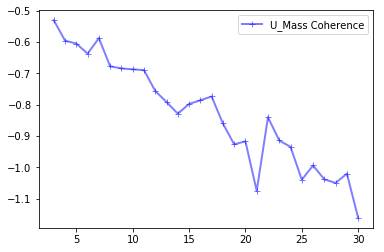

In [27]:
# Plot the coherence over the different 'k' selections
fig, ax = plt.subplots()
ax.plot(list(range(3, end_k+1)), coherence, 'b+-', linewidth=2, label='U_Mass Coherence', alpha=0.5, markevery=1)
ax.legend()
plt.show()

In [28]:
# Parameter selection using extrinsic coherence measure c_nmpi. The FOMC minutes are the background corpus.
end_k=7
coherence=[]
for k in range(3,end_k+1):
    n_components=k
    nmf = NMF(n_components=n_components, random_state=1, beta_loss='kullback-leibler', solver='mu', max_iter=10000).fit(X_tfidf)
    topics=print_topics(nmf, tfidf_feature_names_n1, 5, n_components)
    cm_NMF = gensim.models.coherencemodel.CoherenceModel(topics=topics, texts=minutes, dictionary=dictionary, coherence='c_npmi')
    coherence.append(cm_NMF.get_coherence())
print(coherence)

2018-02-21 19:39:25,486 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2018-02-21 19:39:25,581 : INFO : 1 batches submitted to accumulate stats from 64 documents (147072 virtual)
2018-02-21 19:39:25,692 : INFO : 2 batches submitted to accumulate stats from 128 documents (395046 virtual)
2018-02-21 19:39:25,744 : INFO : 3 batches submitted to accumulate stats from 192 documents (471300 virtual)
2018-02-21 19:39:26,924 : INFO : serializing accumulator to return to master...
2018-02-21 19:39:26,933 : INFO : accumulator serialized
2018-02-21 19:39:27,420 : INFO : serializing accumulator to return to master...
2018-02-21 19:39:27,426 : INFO : accumulator serialized
2018-02-21 19:39:28,795 : INFO : serializing accumulator to return to master...
2018-02-21 19:39:28,803 : INFO : accumulator serialized
2018-02-21 19:39:28,829 : INFO : 3 accumulators retrieved from output queue
2018-02-21 19:39:28,852 : INFO : accumulat

[0.037136750797853522, inf, inf, inf, inf]


In [29]:
# Parameter selection using extrinsic measure c_uci.
end_k=7
coherence=[]
for k in range(3,end_k+1):
    n_components=k
    nmf = NMF(n_components=n_components, random_state=1, beta_loss='kullback-leibler', solver='mu', max_iter=10000).fit(X_tfidf)
    topics=print_topics(nmf, tfidf_feature_names_n1, 15, n_components)
    cm_NMF = gensim.models.coherencemodel.CoherenceModel(topics=topics, texts=minutes, dictionary=dictionary, coherence='c_uci')
    coherence.append(cm_NMF.get_coherence())
print(coherence)

2018-02-21 19:39:44,013 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2018-02-21 19:39:44,096 : INFO : 1 batches submitted to accumulate stats from 64 documents (147072 virtual)
2018-02-21 19:39:44,199 : INFO : 2 batches submitted to accumulate stats from 128 documents (395046 virtual)
2018-02-21 19:39:44,255 : INFO : 3 batches submitted to accumulate stats from 192 documents (471300 virtual)
2018-02-21 19:39:45,917 : INFO : serializing accumulator to return to master...
2018-02-21 19:39:45,925 : INFO : accumulator serialized
2018-02-21 19:39:46,768 : INFO : serializing accumulator to return to master...
2018-02-21 19:39:46,775 : INFO : accumulator serialized
2018-02-21 19:39:48,507 : INFO : serializing accumulator to return to master...
2018-02-21 19:39:48,514 : INFO : accumulator serialized
2018-02-21 19:39:48,548 : INFO : 3 accumulators retrieved from output queue
2018-02-21 19:39:48,563 : INFO : accumulat

[-1.3613581115456697, inf, inf, inf, inf]


In [30]:
# Parameter selection using extrinsic measure c_v, which is the measure preferred as Roeder et al. 2015 found that this measure has the highest correlation to human ratings.
end_k=7
coherence=[]
for k in range(3,end_k+1):
    n_components=k
    nmf = NMF(n_components=n_components, random_state=1, beta_loss='kullback-leibler', solver='mu', max_iter=10000).fit(X_tfidf)
    topics=print_topics(nmf, tfidf_feature_names_n1, 15, n_components)
    cm_NMF = gensim.models.coherencemodel.CoherenceModel(topics=topics, texts=minutes, dictionary=dictionary, coherence='c_v', window_size=110)
    coherence.append(cm_NMF.get_coherence())
print(coherence)

2018-02-21 19:40:08,873 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2018-02-21 19:40:08,966 : INFO : 1 batches submitted to accumulate stats from 64 documents (140672 virtual)
2018-02-21 19:40:09,065 : INFO : 2 batches submitted to accumulate stats from 128 documents (382246 virtual)
2018-02-21 19:40:09,113 : INFO : 3 batches submitted to accumulate stats from 192 documents (456600 virtual)
2018-02-21 19:40:11,647 : INFO : serializing accumulator to return to master...
2018-02-21 19:40:11,668 : INFO : accumulator serialized
2018-02-21 19:40:13,391 : INFO : serializing accumulator to return to master...
2018-02-21 19:40:13,397 : INFO : accumulator serialized
2018-02-21 19:40:16,608 : INFO : serializing accumulator to return to master...
2018-02-21 19:40:16,615 : INFO : accumulator serialized
2018-02-21 19:40:16,650 : INFO : 3 accumulators retrieved from output queue
2018-02-21 19:40:16,665 : INFO : accumulat

[0.44412458241770847, nan, nan, nan, nan]


Based on the three extrinsic coherency measures using the FOMC minutes as a background corpus, there is a consensus to estimate the model with k=3 as this gives the highest level of coherency. Therefore, we perform NMF with three components below and look to give an interpretation of these topics.

In [31]:
best_nmf = NMF(n_components=3, random_state=1, beta_loss='kullback-leibler', solver='mu', max_iter=10000).fit(X_tfidf)
print_top_words(best_nmf, tfidf_feature_names_n1, 15)
best_topics=print_topics(best_nmf, tfidf_feature_names_n1, 15, 3)

Topic #0: inflation longer labor term condition policy price security fund run employment pace percent range agency
Topic #1: board growth approved action basis point discount reserve sustainable productivity belief risk demand price available
Topic #2: security credit financial reserve recovery level exceptionally purchase continue promote subdued facility billion condition housing



I believe that the topic model performed well in the analysis of the FOMC statements as each topic is clearly interpretable. The first topic represents "policy objectives" as it includes descriptors like inflation, security, employment, and price. These are words related to the Federal Reserve's explicit mandates. The second topic is related to "monetary policy tools and targets." Finally, the third topic is related to "financial markets." These are three topics that are useful for further analysis.

In [32]:
# Extract the weights for the model for later regression analysis.
W = best_nmf.fit_transform(X_tfidf) # topic-document weights
H = best_nmf.components_ # word-topic weights

In [33]:
W

array([[  5.90581715e-02,   1.48781547e-01,   2.19510829e-02],
       [  5.82580268e-02,   1.78735187e-01,   0.00000000e+00],
       [  3.47864799e-02,   1.27752295e-01,   0.00000000e+00],
       [  3.68300235e-02,   2.05925115e-01,   2.37691306e-02],
       [  4.12247898e-02,   2.36561799e-01,   5.63049021e-04],
       [  3.98064361e-02,   1.88237598e-01,   2.03729824e-03],
       [  2.10978460e-02,   2.89943400e-01,   2.79688350e-07],
       [  7.95573924e-02,   1.81781127e-01,   0.00000000e+00],
       [  2.08877798e-02,   2.82482419e-01,   2.78917829e-05],
       [  2.65898772e-02,   2.57817115e-01,   3.64958099e-06],
       [  6.48735429e-02,   1.94078893e-01,   0.00000000e+00],
       [  5.51416922e-02,   1.86895209e-01,   0.00000000e+00],
       [  7.60649168e-02,   1.75161110e-01,   0.00000000e+00],
       [  8.74111932e-02,   1.48842448e-01,   0.00000000e+00],
       [  2.27937612e-02,   2.75483081e-01,   3.85514217e-02],
       [  1.26911600e-02,   2.90010117e-01,   2.0513415

## Part 5: Visualization of the NMF Topics

In this section, we plot the topic-document weights as a function of the document dates. This analysis serves the purpose of providing a time series of topic weights to see the intensity of topics over time. This analysis is useful to map historical events back to the output of the topic model as this will provide even more validity to the performance of these models.

In [34]:
# Create dates and NMF weight variables
dates=data['Date']
x = [dt.datetime.strptime(d,'%d/%m/%Y').date() for d in dates]
y1 = W[:,0]
y2 = W[:,1]
y3 = W[:,2]

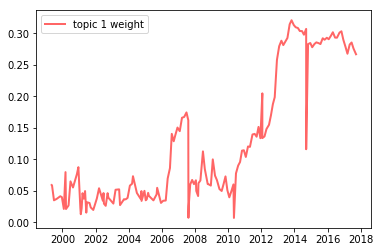

In [35]:
# Plot topic 1 weights as a time series
fig, ax = plt.subplots()
ax.plot(x, y1, 'r-', linewidth=2, label='topic 1 weight', alpha=0.6)
ax.legend()
plt.show()

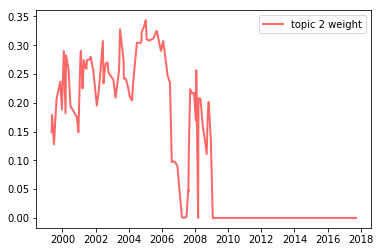

In [36]:
# Plot topic 2 weights as a time series
fig, ax = plt.subplots()
ax.plot(x, y2, 'r-', linewidth=2, label='topic 2 weight', alpha=0.6)
ax.legend()
plt.show()

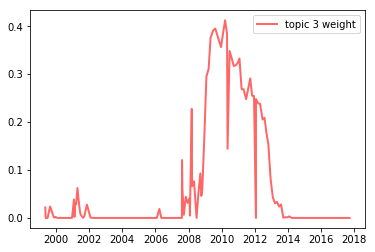

In [37]:
# Plot topic 3 weights as a time series
fig, ax = plt.subplots()
ax.plot(x, y3, 'r-', linewidth=2, label='topic 3 weight', alpha=0.6)
ax.legend()
plt.show()

In this section, I create word clouds for the topics using the wordcloud package. This is good for representing topics in a coherent and clear way. It is also possible to use wordle.net, which is an online, interactive wordcloud creator. It provides more visually appealing wordclouds than the wordcloud package but is not capable of being integrated into Python. It is highly suggested to use that for creating wordclouds to be included in publications.

In [38]:
from wordcloud import WordCloud

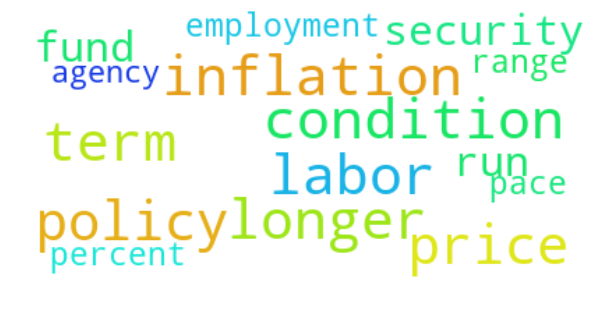

In [39]:
topic1 = WordCloud(ranks_only=True, max_font_size=40, background_color="white").generate(' '.join(best_topics[0]))
plt.figure(figsize=(10, 6))
plt.imshow(topic1, interpolation="bilinear")
plt.axis("off")
plt.show()

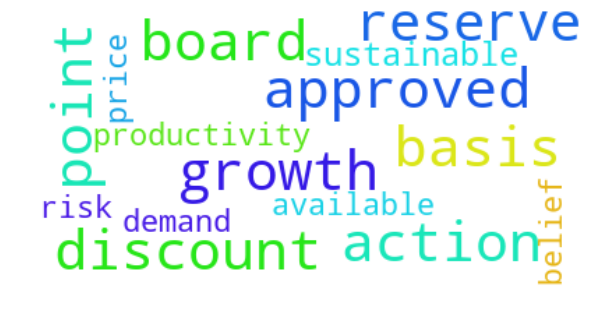

In [40]:
topic2 = WordCloud(ranks_only=True, max_font_size=40, background_color="white").generate(' '.join(best_topics[1]))
plt.figure(figsize=(10, 6))
plt.imshow(topic2, interpolation="bilinear")
plt.axis("off")
plt.show()

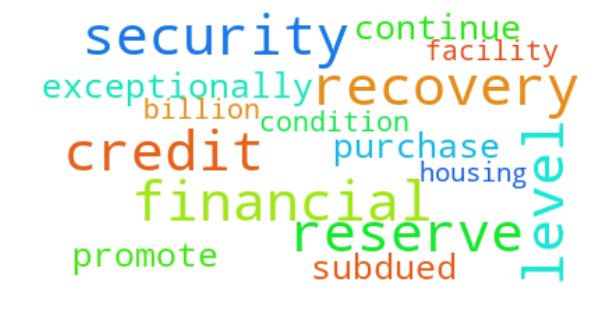

In [41]:
topic3 = WordCloud(ranks_only=True, max_font_size=40, background_color="white").generate(' '.join(best_topics[2]))
plt.figure(figsize=(10, 6))
plt.imshow(topic3,  interpolation="bilinear")
plt.axis("off")
plt.show()

In [42]:
W = pd.DataFrame(W)
W.to_csv("weights.csv")

## Part 6: Topic Modeling using Latent Dirichelet Allocation

In [43]:
# Import LDA model
from sklearn.decomposition import LatentDirichletAllocation

In [44]:
# Parameter selection using intrinsic coherence measure, u_mass.
coherence=[]
end_k = 30
for k in range(3,end_k+1):
    n_components=k
    ldamodel = LatentDirichletAllocation(n_components=n_components, max_iter=10, learning_method='batch', random_state=0).fit(X_tfidf)
    topics=print_topics(ldamodel, tfidf_feature_names_n1, 15, n_components)
    cm_LDA = gensim.models.coherencemodel.CoherenceModel(topics=topics, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    coherence.append(cm_LDA.get_coherence())
    print('k= %d' % k)
    print_top_words(ldamodel, tfidf_feature_names_n1, 15)
print(coherence)

k= 3
Topic #0: inflation security longer labor level agency condition consistent term policy employment range mandate mortgage financial
Topic #1: credit reserve facility extended lending bank liquidity provide period wealth tight constrained billion subdued slack
Topic #2: board growth action basis approved inflation point discount reserve price risk sustainable productivity policy percent

k= 4
Topic #0: inflation labor longer security agency term employment range condition maximum percent policy objective run appropriate
Topic #1: security inflation level recovery mandate consistent purchase low continue agency condition financial credit price exceptionally
Topic #2: unwelcome probability accumulated period important intermeeting fall slack evidence low confirms equal power already consumer
Topic #3: board growth inflation action basis approved point reserve price discount risk policy percent sustainable productivity

k= 5
Topic #0: inflation security longer agency labor consistent 

k= 12
Topic #0: inflation labor expected range based measure percent actual indicator normalization import condition fund near energy
Topic #1: belief potential gain attainment subdued non confirms roughly way help equal little providing met sustain
Topic #2: belief potential gain attainment subdued non confirms roughly way help equal little providing met sustain
Topic #3: inflation security financial longer consistent condition level purchase term agency price mandate policy mortgage continue
Topic #4: board approved basis action point discount reserve growth bank inflation request related governor submitted director
Topic #5: belief potential gain attainment subdued non confirms roughly way help equal little providing met sustain
Topic #6: belief potential gain attainment subdued non confirms roughly way help equal little providing met sustain
Topic #7: belief potential gain attainment subdued non confirms roughly way help equal little providing met sustain
Topic #8: belief potential

k= 17
Topic #0: strength turn contingent preset decision generally believed excess unchanged step moving inception rather persistently course
Topic #1: believed income weakened transaction best following strength payroll amount excess generally slow running nevertheless projected
Topic #2: believed income weakened transaction best following strength payroll amount excess generally slow running nevertheless projected
Topic #3: board available reserve discount demand bank weighted generate weakness background mainly long approved basis may
Topic #4: believed income weakened transaction best following strength payroll amount excess generally slow running nevertheless projected
Topic #5: believed income weakened transaction best following strength payroll amount excess generally slow running nevertheless projected
Topic #6: credit reserve facility liquidity purchase billion lending provide evolving functioning sheet private institution amount preserve
Topic #7: easing combined contraction 

k= 21
Topic #0: soft september past taking attainment strengthening recognizes november recently related modest excess generate growing change
Topic #1: soft september past taking attainment strengthening recognizes november recently related modest excess generate growing change
Topic #2: jr roger ferguson bies susan olson mark vice gramlich edward donald kohn robert bernanke ben
Topic #3: soft september past taking attainment strengthening recognizes november recently related modest excess generate growing change
Topic #4: soft september past taking attainment strengthening recognizes november recently related modest excess generate growing change
Topic #5: board approved basis point action bank discount reserve request governor submitted director related taking york
Topic #6: soft september past taking attainment strengthening recognizes november recently related modest excess generate growing change
Topic #7: soft september past taking attainment strengthening recognizes november re

k= 24
Topic #0: next excess strong action slower october strength january declining declined power fall picked generate carefully
Topic #1: next excess strong action slower october strength january declining declined power fall picked generate carefully
Topic #2: next excess strong action slower october strength january declining declined power fall picked generate carefully
Topic #3: next excess strong action slower october strength january declining declined power fall picked generate carefully
Topic #4: declining october slower picked performance decision related strong next forward generate excess seems restrain sheet
Topic #5: purchase security financial continue recovery inflation level time billion likely promote asset stability policy support
Topic #6: next excess strong action slower october strength january declining declined power fall picked generate carefully
Topic #7: next excess strong action slower october strength january declining declined power fall picked generate c

k= 27
Topic #0: york factor first firming financial ferguson favorable fall facility expect extent extended extend export expects
Topic #1: york factor first firming financial ferguson favorable fall facility expect extent extended extend export expects
Topic #2: york factor first firming financial ferguson favorable fall facility expect extent extended extend export expects
Topic #3: jr weakness susan bies ferguson roger olson mark vice gramlich edward donald kohn unchanged robert
Topic #4: york factor first firming financial ferguson favorable fall facility expect extent extended extend export expects
Topic #5: york factor first firming financial ferguson favorable fall facility expect extent extended extend export expects
Topic #6: york factor first firming financial ferguson favorable fall facility expect extent extended extend export expects
Topic #7: inflation seems implied sustain firming moderate evolution depend utilization keep core nevertheless aggregate possible resource
To

k= 30
Topic #0: probability unwelcome period important accumulated fall intermeeting believe coupled evidence confirms stance accommodative foreseeable already
Topic #1: york factor first firming financial ferguson favorable fall facility expect extent extended extend export expects
Topic #2: uncertain strengthening available unchanged demand santomero stern anthony gary become currently background confirms inventory balanced
Topic #3: available demand background weighted generate weakness mainly long reduction foreseeable may inflationary heightened currently toward
Topic #4: become favorable restraining restrain soft actual household security unchanged normal recognizes strength uncertainty sign uncertain
Topic #5: york factor first firming financial ferguson favorable fall facility expect extent extended extend export expects
Topic #6: york factor first firming financial ferguson favorable fall facility expect extent extended extend export expects
Topic #7: york factor first firming

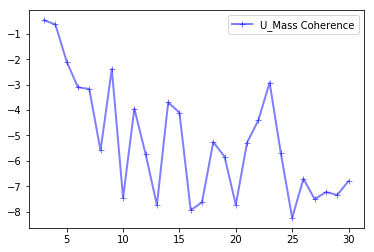

In [45]:
# Plot the coherence over the different 'k' selections
fig, ax = plt.subplots()
ax.plot(list(range(3, end_k+1)), coherence, 'b+-', linewidth=2, label='U_Mass Coherence', alpha=0.5, markevery=1)
ax.legend()
plt.show()

In [46]:
# Parameter selection using extrinsic coherence measure, c_npmi.
end_k=7
coherence=[]
for k in range(3,end_k+1):
    n_components=k
    ldamodel = LatentDirichletAllocation(n_components=n_components, max_iter=10, learning_method='batch', random_state=0).fit(X_tfidf)
    topics=print_topics(ldamodel, tfidf_feature_names_n1, 15, n_components)
    cm_LDA = gensim.models.coherencemodel.CoherenceModel(topics=topics, texts=minutes, dictionary=dictionary, coherence='c_npmi', window_size=110)
    coherence.append(cm_LDA.get_coherence())
print(coherence)

2018-02-21 19:41:15,120 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2018-02-21 19:41:15,252 : INFO : 1 batches submitted to accumulate stats from 64 documents (140672 virtual)
2018-02-21 19:41:15,444 : INFO : 2 batches submitted to accumulate stats from 128 documents (382246 virtual)
2018-02-21 19:41:15,540 : INFO : 3 batches submitted to accumulate stats from 192 documents (456600 virtual)
2018-02-21 19:41:18,186 : INFO : serializing accumulator to return to master...
2018-02-21 19:41:18,207 : INFO : accumulator serialized
2018-02-21 19:41:19,861 : INFO : serializing accumulator to return to master...
2018-02-21 19:41:19,867 : INFO : accumulator serialized
2018-02-21 19:41:23,093 : INFO : serializing accumulator to return to master...
2018-02-21 19:41:23,099 : INFO : accumulator serialized
2018-02-21 19:41:23,135 : INFO : 3 accumulators retrieved from output queue
2018-02-21 19:41:23,151 : INFO : accumulat

[0.059426186974615103, 0.041950586967803814, inf, inf, inf]


In [47]:
# Parameter selection using extrinsic coherence measure, c_uci.
end_k = 7
coherence=[]
for k in range(3,end_k+1):
    n_components=k
    ldamodel = LatentDirichletAllocation(n_components=n_components, max_iter=10, learning_method='batch', random_state=0).fit(X_tfidf)
    topics=print_topics(ldamodel, tfidf_feature_names_n1, 15, n_components)
    cm_LDA = gensim.models.coherencemodel.CoherenceModel(topics=topics, texts=minutes, dictionary=dictionary, coherence='c_uci', window_size=110)
    coherence.append(cm_LDA.get_coherence())
print(coherence)

2018-02-21 19:41:57,934 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2018-02-21 19:41:58,013 : INFO : 1 batches submitted to accumulate stats from 64 documents (140672 virtual)
2018-02-21 19:41:58,111 : INFO : 2 batches submitted to accumulate stats from 128 documents (382246 virtual)
2018-02-21 19:41:58,173 : INFO : 3 batches submitted to accumulate stats from 192 documents (456600 virtual)
2018-02-21 19:42:00,720 : INFO : serializing accumulator to return to master...
2018-02-21 19:42:00,729 : INFO : accumulator serialized
2018-02-21 19:42:03,465 : INFO : serializing accumulator to return to master...
2018-02-21 19:42:03,479 : INFO : accumulator serialized
2018-02-21 19:42:06,788 : INFO : serializing accumulator to return to master...
2018-02-21 19:42:06,795 : INFO : accumulator serialized
2018-02-21 19:42:06,834 : INFO : 3 accumulators retrieved from output queue
2018-02-21 19:42:06,851 : INFO : accumulat

[0.19233066010424502, -0.52036161766061961, inf, inf, inf]


In [48]:
# Parameter selection using extrinsic coherence measure, c_v.
end_k = 7
coherence=[]
for k in range(3,end_k+1):
    n_components=k
    ldamodel = LatentDirichletAllocation(n_components=n_components, max_iter=10, learning_method='batch', random_state=0).fit(X_tfidf)
    topics=print_topics(ldamodel, tfidf_feature_names_n1, 15, n_components)
    cm_LDA = gensim.models.coherencemodel.CoherenceModel(topics=topics, texts=minutes, dictionary=dictionary, coherence='c_v', window_size=110)
    coherence.append(cm_LDA.get_coherence())
print(coherence)

2018-02-21 19:42:41,054 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2018-02-21 19:42:41,130 : INFO : 1 batches submitted to accumulate stats from 64 documents (140672 virtual)
2018-02-21 19:42:41,228 : INFO : 2 batches submitted to accumulate stats from 128 documents (382246 virtual)
2018-02-21 19:42:41,272 : INFO : 3 batches submitted to accumulate stats from 192 documents (456600 virtual)
2018-02-21 19:42:43,818 : INFO : serializing accumulator to return to master...
2018-02-21 19:42:43,827 : INFO : accumulator serialized
2018-02-21 19:42:45,368 : INFO : serializing accumulator to return to master...
2018-02-21 19:42:45,374 : INFO : accumulator serialized
2018-02-21 19:42:48,428 : INFO : serializing accumulator to return to master...
2018-02-21 19:42:48,434 : INFO : accumulator serialized
2018-02-21 19:42:48,464 : INFO : 3 accumulators retrieved from output queue
2018-02-21 19:42:48,477 : INFO : accumulat

[0.42835470321118158, 0.46293842841608723, nan, nan, nan]


In [49]:
best_lda = LatentDirichletAllocation(n_components=3, max_iter=10, learning_method='batch', random_state=0).fit(X_tfidf)
print_top_words(best_lda, tfidf_feature_names_n1, 15)
best_topics1=print_topics(best_lda, tfidf_feature_names_n1, 15, 3)

Topic #0: inflation security longer labor level agency condition consistent term policy employment range mandate mortgage financial
Topic #1: credit reserve facility extended lending bank liquidity provide period wealth tight constrained billion subdued slack
Topic #2: board growth action basis approved inflation point discount reserve price risk sustainable productivity policy percent



## Part 7: Visualization of the LDA Topics

In [50]:
# Get probabilities from LDA model
P = best_lda.transform(X_tfidf) # Get a topic-document probability matrix
P

array([[ 0.06973099,  0.0510671 ,  0.87920191],
       [ 0.113089  ,  0.04609646,  0.84081454],
       [ 0.06896199,  0.06112788,  0.86991013],
       [ 0.06468682,  0.04562778,  0.8896854 ],
       [ 0.0480283 ,  0.04115912,  0.91081258],
       [ 0.0740734 ,  0.04747751,  0.87844909],
       [ 0.03852234,  0.03749131,  0.92398635],
       [ 0.23173905,  0.03937423,  0.72888672],
       [ 0.04017625,  0.03838517,  0.92143858],
       [ 0.04197835,  0.040115  ,  0.91790665],
       [ 0.11399884,  0.04022559,  0.84577557],
       [ 0.0826346 ,  0.04281717,  0.87454823],
       [ 0.15471287,  0.04042585,  0.80486128],
       [ 0.25411229,  0.04612614,  0.69976157],
       [ 0.03759977,  0.03612113,  0.92627911],
       [ 0.0386678 ,  0.03840885,  0.92292334],
       [ 0.0434091 ,  0.03873324,  0.91785765],
       [ 0.04960788,  0.04050825,  0.90988387],
       [ 0.03606729,  0.04428044,  0.91965228],
       [ 0.03924885,  0.03425319,  0.92649795],
       [ 0.04712134,  0.04125604,  0.911

In [51]:
# Create variables of probabilities
y1_1 = P[:,0]
y1_2 = P[:,1]
y1_3 = P[:,2]

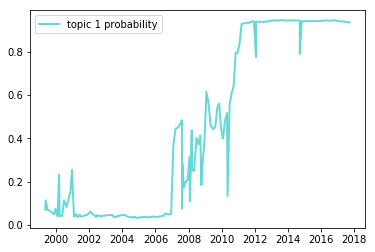

In [52]:
# Plot topic 1 probabilities as a time series
fig, ax = plt.subplots()
ax.plot(x, y1_1, 'c-', linewidth=2, label='topic 1 probability', alpha=0.6)
ax.legend()
plt.show()

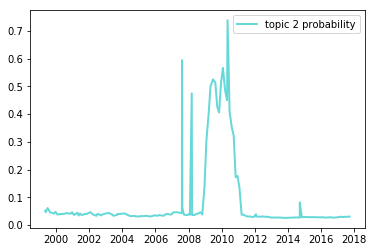

In [53]:
# Plot topic 2 probabilities as a time series
fig, ax = plt.subplots()
ax.plot(x, y1_2, 'c-', linewidth=2, label='topic 2 probability', alpha=0.6)
ax.legend()
plt.show()

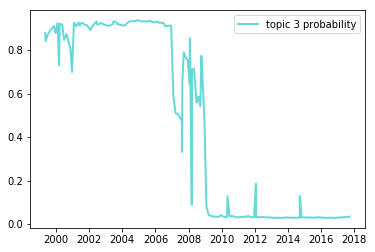

In [54]:
# Plot topic 3 probabilities as a time series
fig, ax = plt.subplots()
ax.plot(x, y1_3, 'c-', linewidth=2, label='topic 3 probability', alpha=0.6)
ax.legend()
plt.show()

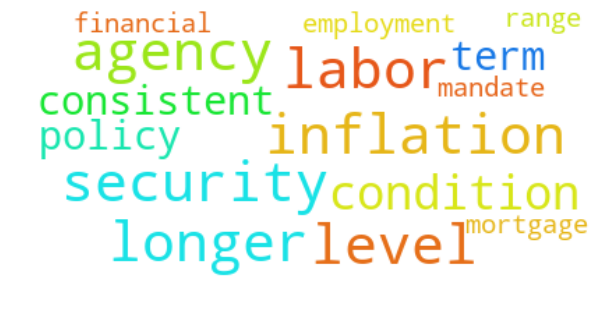

In [55]:
topic1_1 = WordCloud(ranks_only=True, max_font_size=40, background_color="white").generate(' '.join(best_topics1[0]))
plt.figure(figsize=(10, 6))
plt.imshow(topic1_1, interpolation="bilinear")
plt.axis("off")
plt.show()

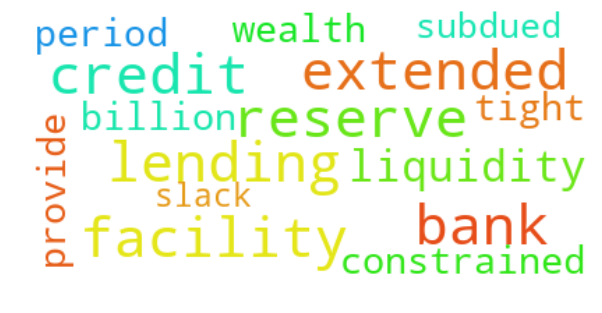

In [56]:
topic1_2 = WordCloud(ranks_only=True, max_font_size=40, background_color="white").generate(' '.join(best_topics1[1]))
plt.figure(figsize=(10, 6))
plt.imshow(topic1_2, interpolation="bilinear")
plt.axis("off")
plt.show()

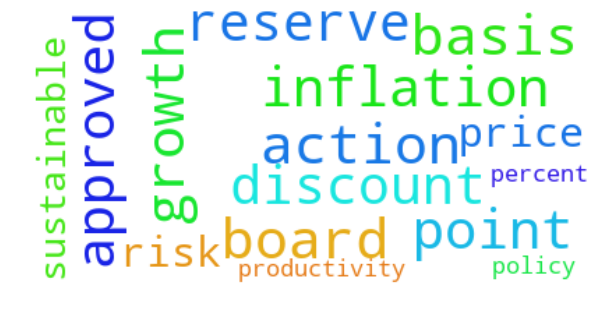

In [57]:
topic1_3 = WordCloud(ranks_only=True, max_font_size=40, background_color="white").generate(' '.join(best_topics1[2]))
plt.figure(figsize=(10, 6))
plt.imshow(topic1_3, interpolation="bilinear")
plt.axis("off")
plt.show()

In [58]:
P = pd.DataFrame(P)
P.to_csv("probabilities.csv")

## Part 8: Establishing Polarity in FOMC Statements

In this section, I will estabish the polarity/sentiment of the FOMC statements. I will use a dictionary-based method that uses the Loughran and McDonald (2011) financial dictionary. This dataset is advantageous as it is a discipline-specific dictionary which is more relevant to central banking language and also contains terminology that would be familiar to financial market participants. Additionally, this provides us a systematic benchmark for establishing polarity that does not require us to choose a list of words that are relevant, which would influence the outcome of our models. The categories are entitled 'negative', 'positive', 'uncertainty', 'litigious', 'modal', and 'constraining.'

The master dictionary and list of words by sentiment can be found at this [website](http://sraf.nd.edu/textual-analysis/resources/).

In [61]:
# Read in pdf file of the list of negative financial terms
pdfFileObj = open('LM_Negative.pdf','rb')
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
pdfReader.numPages

52

In [62]:
# Collect words from each page and lowercase them
negative=[]
for pageNum in range(0, pdfReader.numPages):
    pageObj = pdfReader.getPage(pageNum)
    negative.append(CountVectorizer().build_tokenizer()(pageObj.extractText().lower()))
negative

[['loughran',
  'mcdonald',
  'sentiment',
  'word',
  'lists',
  'negative',
  'abandon',
  'abandoned',
  'abandoning',
  'abandonment',
  'abandonments',
  'abandons',
  'abdicated',
  'abdicates',
  'abdicating',
  'abdication',
  'abdications',
  'aberrant',
  'aberration',
  'aberrational',
  'aberrations',
  'abetting',
  'abnormal',
  'abnormalities',
  'abnormality',
  'abnormally',
  'abolish',
  'abolished',
  'abolishes',
  'abolishing',
  'abrogate',
  'abrogated',
  'abrogates',
  'abrogating',
  'abrogation',
  'abrogations',
  'abrupt',
  'abruptly',
  'abruptness',
  'absence',
  'absences',
  'absenteeism',
  'abuse',
  'abused',
  'abuses',
  'abusing',
  'abusive',
  'abusively',
  'abusiveness',
  'accident'],
 ['accidental',
  'accidentally',
  'accidents',
  'accusation',
  'accusations',
  'accuse',
  'accused',
  'accuses',
  'accusing',
  'acquiesce',
  'acquiesced',
  'acquiesces',
  'acquiescing',
  'acquit',
  'acquits',
  'acquittal',
  'acquittals',
  'ac

In [63]:
# delete the first six terms that are simply part of the list description
del negative[0][0:6]
negative

[['abandon',
  'abandoned',
  'abandoning',
  'abandonment',
  'abandonments',
  'abandons',
  'abdicated',
  'abdicates',
  'abdicating',
  'abdication',
  'abdications',
  'aberrant',
  'aberration',
  'aberrational',
  'aberrations',
  'abetting',
  'abnormal',
  'abnormalities',
  'abnormality',
  'abnormally',
  'abolish',
  'abolished',
  'abolishes',
  'abolishing',
  'abrogate',
  'abrogated',
  'abrogates',
  'abrogating',
  'abrogation',
  'abrogations',
  'abrupt',
  'abruptly',
  'abruptness',
  'absence',
  'absences',
  'absenteeism',
  'abuse',
  'abused',
  'abuses',
  'abusing',
  'abusive',
  'abusively',
  'abusiveness',
  'accident'],
 ['accidental',
  'accidentally',
  'accidents',
  'accusation',
  'accusations',
  'accuse',
  'accused',
  'accuses',
  'accusing',
  'acquiesce',
  'acquiesced',
  'acquiesces',
  'acquiescing',
  'acquit',
  'acquits',
  'acquittal',
  'acquittals',
  'acquitte',
  'acquitting',
  'adulterate',
  'adulterated',
  'adulterating',
  

In [64]:
# Calculate the sum of negative terms and document length within each statement
neg_sum = list(range(0, len(statements)))
doc_length = list(range(0, len(statements)))
for i in range(0, len(statements)):
    neg_count = 0
    fomc = statements[i]
    for word in fomc:
        for neg in negative:
            if((word in set(neg)) == True):
                neg_count += 1
    neg_sum[i] = neg_count
    doc_length[i] = len(statements[i])

In [65]:
# Transform negative sum list into a numpy array
neg_sum = np.asarray(neg_sum)
neg_sum

array([ 1,  4,  4,  3,  4,  3,  3,  0,  3,  4,  0,  1,  2,  9,  6,  3,  2,
        5,  9,  5,  4,  6,  5,  4,  3,  4,  3,  1,  0,  0,  4,  2,  1,  0,
        1,  4,  2,  2,  3,  2,  2,  2,  5,  0,  0,  0,  1,  0,  0,  2,  0,
        1,  0,  0,  1,  7,  1,  0,  1,  1,  1,  1,  0,  1,  1,  0,  2,  3,
        2,  4,  0,  3,  5,  6,  4,  4,  2,  0,  6,  5,  4,  4,  7, 12,  8,
        8,  6,  8, 10,  7,  7,  9,  7,  8,  5,  7,  8,  2,  6,  5,  7, 11,
       13, 10,  4,  4, 11, 13, 11,  8,  6,  9,  9,  8,  8, 12, 11,  9,  9,
        9,  9,  8,  7,  9,  9, 11, 10, 13, 11, 10,  8,  5,  9,  8,  0,  9,
        9, 10,  9, 10,  5,  6,  7,  6,  7, 10,  4,  5, 10,  6,  5,  4,  5,
        3,  1,  5,  3,  3,  7])

In [66]:
# Transform document length list into a numpy array
doc_length = np.asarray(doc_length)
doc_length

array([ 98,  80,  49, 109, 145,  89, 124, 108, 125, 119,  99,  97, 108,
        90, 157, 107, 139, 143, 175, 162, 103, 129, 123, 132, 120,  79,
       138, 151, 105,  95, 103, 120,  99,  96, 134, 127, 177, 113,  96,
        96,  86,  92,  91, 119, 139, 140, 153, 143, 184, 168, 134, 155,
       155, 141, 157, 206, 117, 133, 136, 147, 145, 105,  96, 101, 107,
        78,  72,  73,  79, 100,  50,  49, 129, 159, 149, 124, 126, 208,
       152, 164, 128, 124, 105, 203, 157, 228, 268, 227, 231, 198, 220,
       226, 256, 321, 309, 250, 230, 131, 205, 255, 240, 272, 272, 238,
       249, 249, 247, 289, 313, 270, 239, 334, 231, 238, 243, 267, 249,
       309, 312, 394, 378, 379, 390, 404, 407, 470, 460, 509, 488, 525,
       484, 479, 503, 539,  91, 432, 442, 344, 347, 345, 328, 325, 353,
       344, 340, 320, 329, 333, 306, 324, 345, 339, 309, 289, 295, 307,
       320, 290, 307])

In [67]:
# Calculate the proportion of negative words in each statement
negativity_proportion = neg_sum/doc_length
negativity_proportion

array([ 0.01020408,  0.05      ,  0.08163265,  0.02752294,  0.02758621,
        0.03370787,  0.02419355,  0.        ,  0.024     ,  0.03361345,
        0.        ,  0.01030928,  0.01851852,  0.1       ,  0.03821656,
        0.02803738,  0.01438849,  0.03496503,  0.05142857,  0.0308642 ,
        0.03883495,  0.04651163,  0.04065041,  0.03030303,  0.025     ,
        0.05063291,  0.02173913,  0.00662252,  0.        ,  0.        ,
        0.03883495,  0.01666667,  0.01010101,  0.        ,  0.00746269,
        0.03149606,  0.01129944,  0.01769912,  0.03125   ,  0.02083333,
        0.02325581,  0.02173913,  0.05494505,  0.        ,  0.        ,
        0.        ,  0.00653595,  0.        ,  0.        ,  0.01190476,
        0.        ,  0.00645161,  0.        ,  0.        ,  0.00636943,
        0.03398058,  0.00854701,  0.        ,  0.00735294,  0.00680272,
        0.00689655,  0.00952381,  0.        ,  0.00990099,  0.00934579,
        0.        ,  0.02777778,  0.04109589,  0.02531646,  0.04

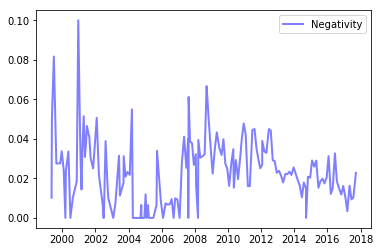

In [68]:
# Plot the proportion of negativity as a time series
fig, ax = plt.subplots()
ax.plot(x, negativity_proportion, 'b-', linewidth=2, label='Negativity', alpha=0.5, markevery=1)
ax.legend()
plt.show()

In [69]:
# Export the proportion of negativity to csv file
NegProp = pd.DataFrame(negativity_proportion)
NegProp.to_csv("NegProp.csv")

## Part 9: Calculating Uncertainty in FOMC Statements

In this section, I look to calculate a level of uncertainty in each document. Similar to the previous section, I use a dictionary-based method incorporating the sentimental list of words provided in the financial dictionary by Loughran and McDonald (2011). This allows me to come up with a measure of uncertainty within the statements. The literature looks at uncertainty as a main contributor to financial market volatility, which is channeled into risk premia. Using this measure, we can look at the influence of uncertainty on the yield curve.

In [70]:
# Read in pdf file of list of uncertain financial terms
pdfFileObj2 = open('LM_Uncertainty.pdf','rb')
pdfReader2 = PyPDF2.PdfFileReader(pdfFileObj2)
pdfReader2.numPages

7

In [71]:
# Collect the uncertainty terms on each page into a list
uncertainty=[]
for pageNum in range(0, pdfReader2.numPages):
    pageObj2 = pdfReader2.getPage(pageNum)
    uncertainty.append(CountVectorizer().build_tokenizer()(pageObj2.extractText().lower()))
uncertainty

[['loughran',
  'mcdonald',
  'sentiment',
  'word',
  'lists',
  'uncertainty',
  'abeyance',
  'abeyances',
  'almost',
  'alteration',
  'alterations',
  'ambiguities',
  'ambiguity',
  'ambiguous',
  'anomalies',
  'anomalous',
  'anomalously',
  'anomaly',
  'anticipate',
  'anticipated',
  'anticipates',
  'anticipating',
  'anticipation',
  'anticipations',
  'apparent',
  'apparently',
  'appear',
  'appeared',
  'appearing',
  'appears',
  'approximate',
  'approximated',
  'approximately',
  'approximates',
  'approximating',
  'approximation',
  'approximations',
  'arbitrarily',
  'arbitrariness',
  'arbitrary',
  'assume',
  'assumed',
  'assumes',
  'assuming',
  'assumption',
  'assumptions',
  'believe',
  'believed',
  'believes',
  'believing'],
 ['cautious',
  'cautiously',
  'cautiousness',
  'clarification',
  'clarifications',
  'conceivable',
  'conceivably',
  'conditional',
  'conditionally',
  'confuses',
  'confusing',
  'confusingly',
  'confusion',
  'conti

In [72]:
# Delete the first six terms that are simply part of the list description
del uncertainty[0][0:6]
uncertainty

[['abeyance',
  'abeyances',
  'almost',
  'alteration',
  'alterations',
  'ambiguities',
  'ambiguity',
  'ambiguous',
  'anomalies',
  'anomalous',
  'anomalously',
  'anomaly',
  'anticipate',
  'anticipated',
  'anticipates',
  'anticipating',
  'anticipation',
  'anticipations',
  'apparent',
  'apparently',
  'appear',
  'appeared',
  'appearing',
  'appears',
  'approximate',
  'approximated',
  'approximately',
  'approximates',
  'approximating',
  'approximation',
  'approximations',
  'arbitrarily',
  'arbitrariness',
  'arbitrary',
  'assume',
  'assumed',
  'assumes',
  'assuming',
  'assumption',
  'assumptions',
  'believe',
  'believed',
  'believes',
  'believing'],
 ['cautious',
  'cautiously',
  'cautiousness',
  'clarification',
  'clarifications',
  'conceivable',
  'conceivably',
  'conditional',
  'conditionally',
  'confuses',
  'confusing',
  'confusingly',
  'confusion',
  'contingencies',
  'contingency',
  'contingent',
  'contingently',
  'contingents',
  

In [73]:
# Calculate the sum of uncertain terms within each statement
uncertain_sum = list(range(0, len(statements)))
for i in range(0, len(statements)):
    uncertain_count = 0
    fomc = statements[i]
    for word in fomc:
        for unc in uncertainty:
            if((word in set(unc)) == True):
                uncertain_count += 1
    uncertain_sum[i] = uncertain_count

In [74]:
# Transform the uncertainty sum list into a numpy array
uncertain_sum = np.asarray(uncertain_sum)
uncertain_sum

array([ 3,  4,  2,  1,  4,  4,  3,  4,  3,  3,  7,  4,  7,  5,  4,  5,  4,
       11, 10,  9,  6,  3,  3,  7,  7,  4,  2,  4,  3,  2,  3,  5,  2,  3,
        9,  5,  4,  7,  5,  6,  5,  7,  6,  7,  4,  3,  5,  3,  3,  2,  3,
        5,  2,  2,  3,  6,  4,  5,  7,  5,  5,  4,  5,  5,  5,  9,  4,  4,
        4,  6,  2,  3,  3,  7,  4,  5,  3,  0,  3,  3,  5,  3,  4,  4,  2,
        1,  7,  5,  6,  4,  4,  5,  7,  7,  7,  6,  6,  0,  7,  5,  5,  7,
        5,  3,  5,  3,  4,  7,  5,  7,  7, 13,  5,  6,  7,  8,  7,  6,  6,
        9, 10, 10,  9,  8,  9, 11, 12,  8,  7, 10, 10,  9, 12, 15,  1, 14,
       13,  9,  9,  8, 10,  7,  9,  7,  4,  4,  4,  3,  4,  4,  6,  7,  6,
        6,  9,  7,  9,  7,  7])

In [75]:
# Calculate the proportion of uncertain words in each statement
uncertainty_proportion = uncertain_sum/doc_length
uncertainty_proportion

array([ 0.03061224,  0.05      ,  0.04081633,  0.00917431,  0.02758621,
        0.04494382,  0.02419355,  0.03703704,  0.024     ,  0.02521008,
        0.07070707,  0.04123711,  0.06481481,  0.05555556,  0.02547771,
        0.04672897,  0.02877698,  0.07692308,  0.05714286,  0.05555556,
        0.05825243,  0.02325581,  0.02439024,  0.0530303 ,  0.05833333,
        0.05063291,  0.01449275,  0.02649007,  0.02857143,  0.02105263,
        0.02912621,  0.04166667,  0.02020202,  0.03125   ,  0.06716418,
        0.03937008,  0.02259887,  0.0619469 ,  0.05208333,  0.0625    ,
        0.05813953,  0.07608696,  0.06593407,  0.05882353,  0.02877698,
        0.02142857,  0.03267974,  0.02097902,  0.01630435,  0.01190476,
        0.02238806,  0.03225806,  0.01290323,  0.0141844 ,  0.01910828,
        0.02912621,  0.03418803,  0.03759398,  0.05147059,  0.03401361,
        0.03448276,  0.03809524,  0.05208333,  0.04950495,  0.04672897,
        0.11538462,  0.05555556,  0.05479452,  0.05063291,  0.06

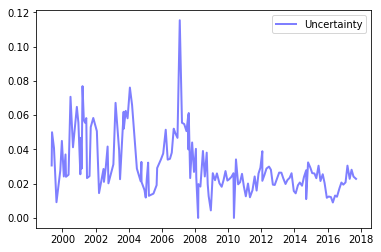

In [76]:
# Plot the proportion of uncertainty as a time series
fig, ax = plt.subplots()
ax.plot(x, uncertainty_proportion, 'b-', linewidth=2, label='Uncertainty', alpha=0.5, markevery=1)
ax.legend()
plt.show()

In [77]:
# Export the uncertainty proportion to csv file
UncertProp = pd.DataFrame(uncertainty_proportion)
UncertProp.to_csv("UncertProp.csv")